In [18]:
import pandas as pd

df = pd.read_csv('아웃소싱 데이터/Expert_Data.csv')
df.head()

,판매자ID,판매자,판매 서비스 수,총 판매 금액,프리미엄 서비스 가입여부,신속 알람 서비스 사용여부
0,V2_0,김러그,326,147927420,가입,미사용
1,V2_1,디프라이,43,146832200,가입,미사용
2,V2_2,Sailorkr,14,140029000,가입,미사용
3,V2_3,신뢰할만한지식인65,16,130713200,가입,미사용
4,V2_4,에픽핫,18,126229400,가입,미사용


In [3]:
df.columns

Index(['판매자ID', '판매자', '판매 서비스 수', '총 판매 금액', '프리미엄 서비스 가입여부',
       '신속 알람 서비스 사용여부'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2066 entries, 0 to 2065
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   판매자ID           2066 non-null   object
 1   판매자             2066 non-null   object
 2   판매 서비스 수        2066 non-null   int64 
 3   총 판매 금액         2066 non-null   int64 
 4   프리미엄 서비스 가입여부   2066 non-null   object
 5   신속 알람 서비스 사용여부  2066 non-null   object
dtypes: int64(2), object(4)
memory usage: 97.0+ KB


### 이상치 확인, 분포 확인

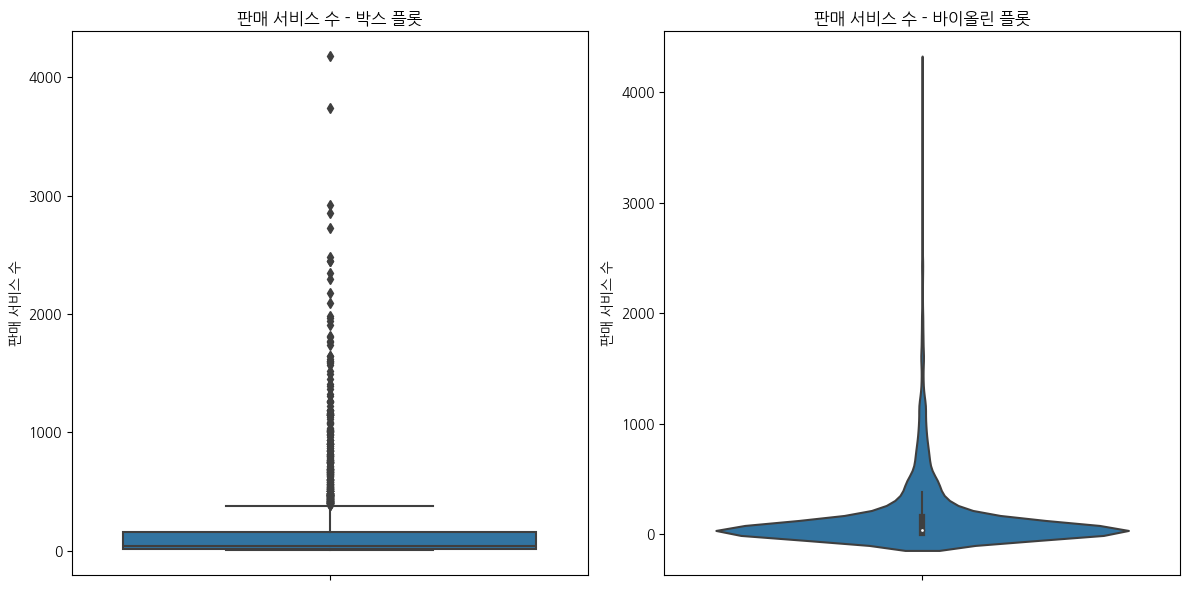

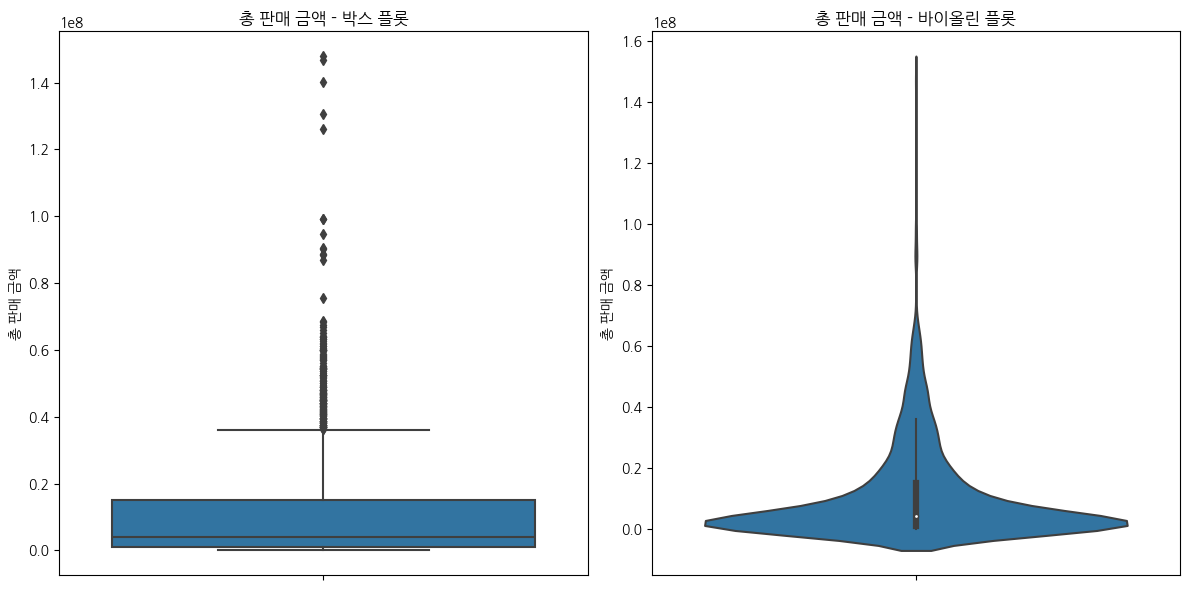

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import koreanize_matplotlib

# 시각화 설정
plt.figure(figsize=(12, 6))

# 판매 서비스 수 - 박스 플롯
plt.subplot(1, 2, 1)
sns.boxplot(data=df, y='판매 서비스 수')
plt.title('판매 서비스 수 - 박스 플롯')

# 판매 서비스 수 - 바이올린 플롯
plt.subplot(1, 2, 2)
sns.violinplot(data=df, y='판매 서비스 수')
plt.title('판매 서비스 수 - 바이올린 플롯')

plt.tight_layout()
plt.show()

# 총 판매 금액 - 박스 플롯과 바이올린 플롯
plt.figure(figsize=(12, 6))

# 총 판매 금액 - 박스 플롯
plt.subplot(1, 2, 1)
sns.boxplot(data=df, y='총 판매 금액')
plt.title('총 판매 금액 - 박스 플롯')

# 총 판매 금액 - 바이올린 플롯
plt.subplot(1, 2, 2)
sns.violinplot(data=df, y='총 판매 금액')
plt.title('총 판매 금액 - 바이올린 플롯')

plt.tight_layout()
plt.show()


In [17]:
df.describe(include='all')

,판매자ID,판매자,판매 서비스 수,총 판매 금액,프리미엄 서비스 가입여부,신속 알람 서비스 사용여부
count,2066,2066,2066.00000,2.066000e+03,2066,2066
unique,2066,2066,NaN,NaN,2,2
top,V2_0,김러그,NaN,NaN,미가입,미사용
freq,1,1,NaN,NaN,1774,1687
mean,NaN,NaN,166.63940,1.116331e+07,NaN,NaN
std,NaN,NaN,342.30936,1.618498e+07,NaN,NaN
min,NaN,NaN,1.00000,5.000000e+03,NaN,NaN
25%,NaN,NaN,9.00000,9.618500e+05,NaN,NaN
50%,NaN,NaN,36.00000,4.139370e+06,NaN,NaN
75%,NaN,NaN,158.75000,1.508420e+07,NaN,NaN


### 판매 수 세그먼트 별 시각화

- p-값이 0.05보다 작으며 프리미엄 서비스 가입 여부 간 유의미한 관계가 있다.
- p-값이 0.05보다 작으며 신속 알람 서비스 사용여부 간 유의미한 관계가 있다.

In [20]:
# 25%, 50% (중위수), 75% 분위수 계산
q1 = df['총 판매 금액'].quantile(0.25)
median = df['총 판매 금액'].quantile(0.5)
q3 = df['총 판매 금액'].quantile(0.75)

# 분위수를 기준으로 세그먼트화
def segment_sales(amount):
    if amount <= q1:
        return '저소득'
    elif q1 < amount <= q3:
        return '중위 소득'
    else:
        return '고소득'

df['소득'] = df['총 판매 금액'].apply(segment_sales)


In [24]:
df

,판매자ID,판매자,판매 서비스 수,총 판매 금액,프리미엄 서비스 가입여부,신속 알람 서비스 사용여부,소득별,소득
0,V2_0,김러그,326,147927420,가입,미사용,고소득,고소득
1,V2_1,디프라이,43,146832200,가입,미사용,고소득,고소득
2,V2_2,Sailorkr,14,140029000,가입,미사용,고소득,고소득
3,V2_3,신뢰할만한지식인65,16,130713200,가입,미사용,고소득,고소득
4,V2_4,에픽핫,18,126229400,가입,미사용,고소득,고소득
...,...,...,...,...,...,...,...,...
2061,V2_2061,web3expert,1,7800,미가입,미사용,저소득,저소득
2062,V2_2062,enos,2,6950,미가입,미사용,저소득,저소득
2063,V2_2063,K9027456501,1,5000,미가입,미사용,저소득,저소득
2064,V2_2064,승쿠딩,1,5000,가입,미사용,저소득,저소득


프리미엄 서비스, 신속알람 서비스 모두 사용 빈도가 적다

In [34]:
df['프리미엄 서비스 가입여부'].value_counts()

프리미엄 서비스 가입여부
미가입    1774
가입      292
Name: count, dtype: int64

In [36]:
df['신속 알람 서비스 사용여부'].value_counts()

신속 알람 서비스 사용여부
미사용    1687
사용      379
Name: count, dtype: int64

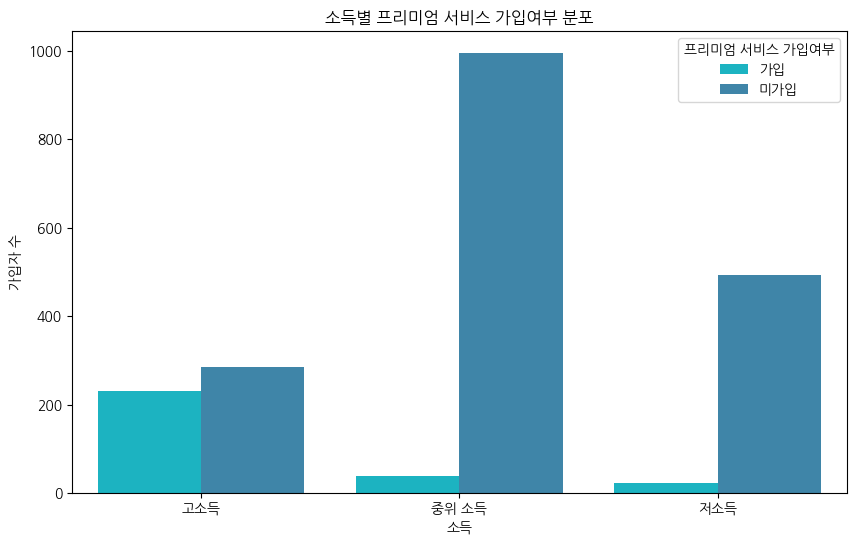

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# 시각화 설정
plt.figure(figsize=(10, 6))

# 판매 금액 세그먼트별 프리미엄 서비스 가입여부 countplot (색상 커스터마이징)
sns.countplot(
    data=df,
    x='소득',
    hue='프리미엄 서비스 가입여부',
    palette=['#00cadc', '#2d8bba']  # 색상 설정 (주 색상과 유사한 보조 색상)
)

plt.title('소득별 프리미엄 서비스 가입여부 분포')
plt.xlabel('소득')
plt.ylabel('가입자 수')
plt.legend(title='프리미엄 서비스 가입여부')
plt.show()


In [23]:
from scipy import stats

# 판매 금액 세그먼트와 신속 알람 서비스 사용 여부의 교차 테이블 생성
contingency_table = pd.crosstab(df['소득'], df['프리미엄 서비스 가입여부'])

# 카이제곱 검정 수행
chi2_statistic, p_value, dof, expected = stats.chi2_contingency(contingency_table)

print(f"카이제곱 통계량: {chi2_statistic}")
print(f"p-값: {p_value}")
print(f"자유도: {dof}")
print(f"기대 빈도:\n{expected}")

카이제곱 통계량: 525.2544095271941
p-값: 8.758992883642053e-115
자유도: 2
기대 빈도:
[[ 72.92933204 443.07066796]
 [ 73.07066796 443.92933204]
 [146.         887.        ]]


In [34]:
# 소득별 신속 알람 서비스 사용 여부의 count 집계
count_table = df.groupby(['소득', '프리미엄 서비스 가입여부']).size().unstack(fill_value=0)

# 비율 계산
ratio_table = count_table.div(count_table.sum(axis=1), axis=0)

# 소득별 총 수 계산
total_count = df['소득'].value_counts(normalize=True)

# 결과를 데이터프레임으로 변환
result_df = ratio_table.reset_index()

# 열 이름 변경
result_df.columns.name = None  # 인덱스 이름 제거
result_df.columns = ['소득', '미가입 비율', '가입 비율']

# 소득 비율 추가
result_df['소득 비율'] = result_df['소득'].map(total_count)

# 결과 출력
result_df

,소득,미가입 비율,가입 비율,소득 비율
0,고소득,0.445736,0.554264,0.249758
1,저소득,0.044487,0.955513,0.250242
2,중위 소득,0.037754,0.962246,0.500000


In [25]:
# 프리미엄 서비스 가입 여부에 따른 총 판매 금액 데이터 준비
joined_sales = df[df['프리미엄 서비스 가입여부'] == '가입']['총 판매 금액']
not_joined_sales = df[df['프리미엄 서비스 가입여부'] == '미가입']['총 판매 금액']

# t-검정 수행
t_statistic, p_value = stats.ttest_ind(joined_sales, not_joined_sales, equal_var=False)

# 결과 출력
print(f'T-statistic: {t_statistic}, p-value: {p_value}')

# p-value 해석
alpha = 0.05
if p_value < alpha:
    print("프리미엄 서비스 가입 여부에 따라 총 판매 금액에 유의미한 차이가 있습니다. (귀무가설 기각)")
else:
    print("프리미엄 서비스 가입 여부에 따라 총 판매 금액에 유의미한 차이가 없습니다. (귀무가설 채택)")

T-statistic: 20.641288332417524, p-value: 1.0562991839952855e-59
프리미엄 서비스 가입 여부에 따라 총 판매 금액에 유의미한 차이가 있습니다. (귀무가설 기각)


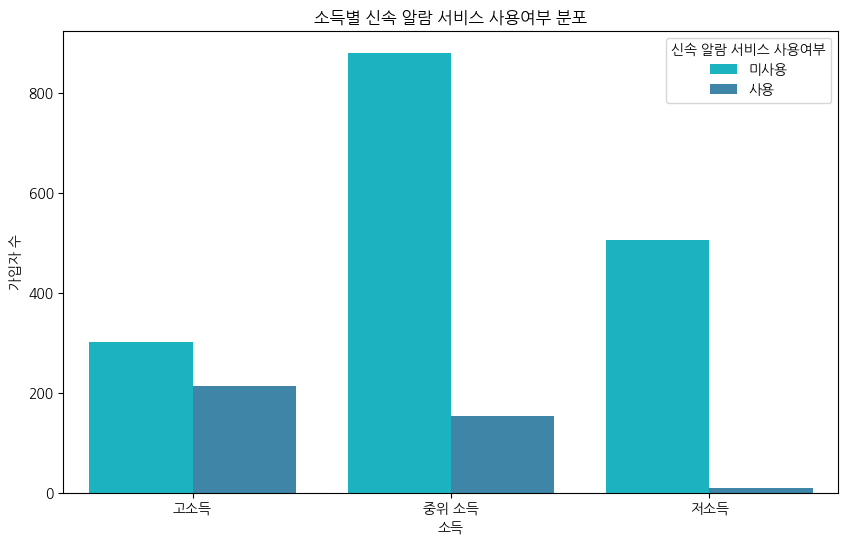

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# 시각화 설정
plt.figure(figsize=(10, 6))

# 판매 금액 세그먼트별 프리미엄 서비스 가입여부 countplot
sns.countplot(
    data=df,
    x='소득',
    hue='신속 알람 서비스 사용여부',
    palette=['#00cadc', '#2d8bba']  # 색상 설정 (주 색상과 유사한 보조 색상)
)
plt.title('소득별 신속 알람 서비스 사용여부 분포')
plt.xlabel('소득')
plt.ylabel('가입자 수')
plt.legend(title='신속 알람 서비스 사용여부')
plt.show()


In [32]:
# 소득별 신속 알람 서비스 사용 여부의 count 집계
count_table = df.groupby(['소득', '신속 알람 서비스 사용여부']).size().unstack(fill_value=0)

# 비율 계산
ratio_table = count_table.div(count_table.sum(axis=1), axis=0)

# 소득별 총 수 계산
total_count = df['소득'].value_counts(normalize=True)

# 결과를 데이터프레임으로 변환
result_df = ratio_table.reset_index()

# 열 이름 변경
result_df.columns.name = None  # 인덱스 이름 제거
result_df.columns = ['소득', '미사용 비율', '사용 비율']

# 소득 비율 추가
result_df['소득 비율'] = result_df['소득'].map(total_count)

# 결과 출력
result_df

,소득,미사용 비율,사용 비율,소득 비율
0,고소득,0.585271,0.414729,0.249758
1,저소득,0.978723,0.021277,0.250242
2,중위 소득,0.850920,0.149080,0.500000


In [28]:
# 판매 금액 세그먼트와 신속 알람 서비스 사용 여부의 교차 테이블 생성
contingency_table = pd.crosstab(df['소득'], df['신속 알람 서비스 사용여부'])

# 카이제곱 검정 수행
chi2_statistic, p_value, dof, expected = stats.chi2_contingency(contingency_table)

print(f"카이제곱 통계량: {chi2_statistic}")
print(f"p-값: {p_value}")
print(f"자유도: {dof}")
print(f"기대 빈도:\n{expected}")

카이제곱 통계량: 283.17750349783637
p-값: 3.226906752802627e-62
자유도: 2
기대 빈도:
[[421.34172314  94.65827686]
 [422.15827686  94.84172314]
 [843.5        189.5       ]]


In [4]:
import pandas as pd

data = pd.read_csv('병합데이터.csv')

# 25%, 50% (중위수), 75% 분위수 계산
q1 = data['총 판매 금액'].quantile(0.25)
median = data['총 판매 금액'].quantile(0.5)
q3 = data['총 판매 금액'].quantile(0.75)

# 분위수를 기준으로 세그먼트화
def segment_sales(amount):
    if amount <= q1:
        return 'Low'
    elif q1 < amount <= q3:
        return 'Medium'
    else:
        return 'High'

data['판매 금액 세그먼트'] = data['총 판매 금액'].apply(segment_sales)


In [6]:
from scipy import stats

# 판매 금액 세그먼트와 신속 알람 서비스 사용 여부의 교차 테이블 생성
contingency_table = pd.crosstab(data['판매 금액 세그먼트'], data['신속 알람 서비스 사용여부'])

# 카이제곱 검정 수행
chi2_statistic, p_value, dof, expected = stats.chi2_contingency(contingency_table)

print(f"카이제곱 통계량: {chi2_statistic}")
print(f"p-값: {p_value}")
print(f"자유도: {dof}")
print(f"기대 빈도:\n{expected}")

카이제곱 통계량: 41708.40694135643
p-값: 0.0
자유도: 2
기대 빈도:
[[ 27786.15502052  58001.84497948]
 [ 27919.59904379  58280.40095621]
 [ 55803.24593569 116485.75406431]]


### 총 판매수 - 총 판매 금액 시각화

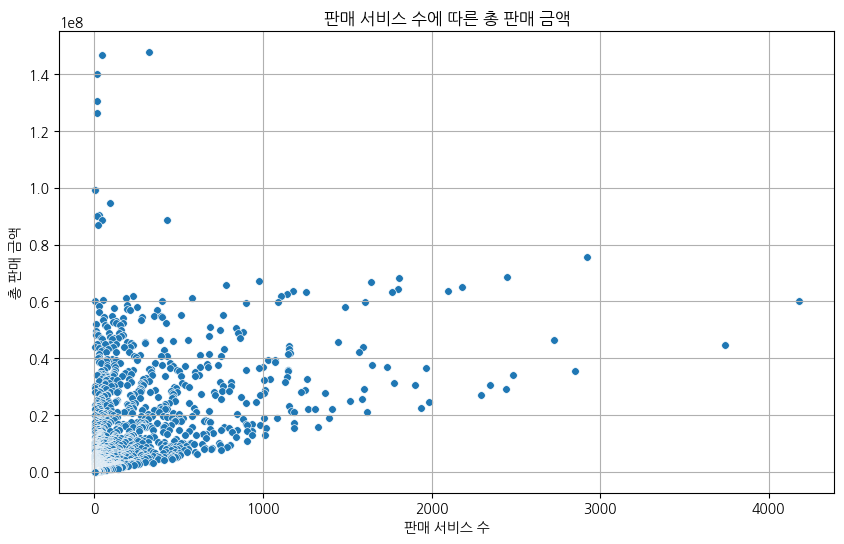

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# 시각화 설정
plt.figure(figsize=(10, 6))

# 산점도 시각화
sns.scatterplot(data=df, x='판매 서비스 수', y='총 판매 금액', s=30)
plt.title('판매 서비스 수에 따른 총 판매 금액')
plt.xlabel('판매 서비스 수')
plt.ylabel('총 판매 금액')
# plt.legend(title='판매자')
plt.grid(True)

plt.show()


In [30]:
from scipy import stats
# Pearson 상관관계 계산
correlation, p_value = stats.pearsonr(df['판매 서비스 수'], df['총 판매 금액'])

# 결과 출력
print(f"상관관계: {correlation}, p-값: {p_value}")

상관관계: 0.4426239870819304, p-값: 7.391088679489816e-100


### 판매금액 세그먼트 별 총 판매금액

- high와 median의 각 총 수입을 보니 수익은 비슷하다.
- 그럼 프리미엄 서비스와, 신속 알람 서비스는 고 수익을 내는 판매자만 주로 사용하는데

- 주 고객 층인 Medium은 위 와 같은 서비스를 사용하지 않고 High와 비슷한 수익을 낸다.
- 위 서비스 기능은 high층을 위한 기능이라곤 생각하지 않기 때문에
- Mediun 고객 층에게 필요한 서비스가 필요하며, Medium의 층을 위한 서비스를 제공할 시 더 많은 유입과 수익률이 기대된다.



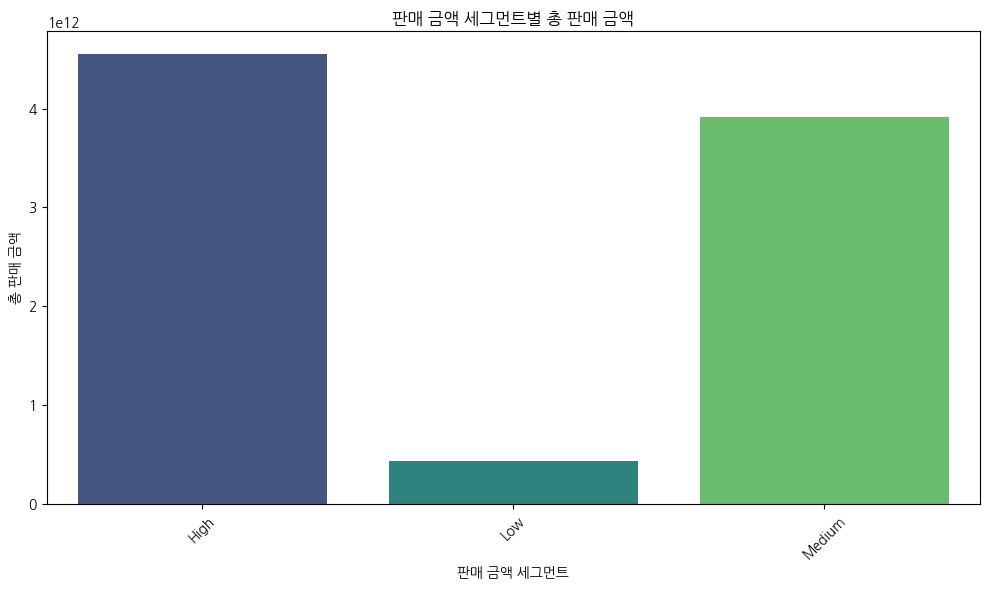

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib
# 각 세그먼트별 총 판매 금액 집계
total_sales_by_segment = data.groupby('판매 금액 세그먼트')['총 판매 금액'].sum().reset_index()

# 시각화 설정
plt.figure(figsize=(10, 6))

# 바 차트 생성
sns.barplot(data=total_sales_by_segment, x='판매 금액 세그먼트', y='총 판매 금액', palette='viridis')

# 제목 및 축 라벨 설정
plt.title('판매 금액 세그먼트별 총 판매 금액')
plt.xlabel('판매 금액 세그먼트')
plt.ylabel('총 판매 금액')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [39]:
df.head()

,판매자ID,판매자,판매 서비스 수,총 판매 금액,프리미엄 서비스 가입여부,신속 알람 서비스 사용여부,판매 금액 세그먼트
0,V2_0,김러그,326,147927420,가입,미사용,High
1,V2_1,디프라이,43,146832200,가입,미사용,High
2,V2_2,Sailorkr,14,140029000,가입,미사용,High
3,V2_3,신뢰할만한지식인65,16,130713200,가입,미사용,High
4,V2_4,에픽핫,18,126229400,가입,미사용,High


In [44]:
# ANOVA 검정: 세그먼트별로 총 판매 금액 그룹화
groups = [df['총 판매 금액'][df['판매 금액 세그먼트'] == segment] for segment in df['판매 금액 세그먼트'].unique()]

# ANOVA 실행
f_stat, p_value = stats.f_oneway(*groups)

# p-value를 소수점 4자리까지 출력
print("F-Statistic:", f_stat)
print(f"p-값: {p_value:.10f}")

# 해석
if p_value < 0.05:
    print("귀무 가설을 기각합니다. 세그먼트 간의 총 판매 금액에 유의미한 차이가 있습니다.")
else:
    print("귀무 가설을 기각하지 않습니다. 세그먼트 간의 총 판매 금액에 유의미한 차이가 없습니다.")

F-Statistic: 1922.241643417228
p-값: 0.0000000000
귀무 가설을 기각합니다. 세그먼트 간의 총 판매 금액에 유의미한 차이가 있습니다.


In [29]:
df['소득'].value_counts()

소득
중위 소득    1033
저소득       517
고소득       516
Name: count, dtype: int64

#### 판매 금액 세그먼트별 대분류 확인

In [21]:
data = pd.read_csv('아웃소싱 데이터/Log_Data02.csv')

In [23]:
# 중복된 판매자 엔티티 제거 (첫 번째 행만 남김)
data_unique = data.drop_duplicates(subset='판매자', keep='first')

# 결과 출력
data_unique

,거래일자,수수료율,고객ID,프로그램수정횟수,추가결제금액,거래취소여부,거래취소일자,서비스명,판매자,판매금액,서비스가격,평점,이용자수,대분류,서비스번호
0,20210201,6.5,5030100140,0.0,9800,NaN,NaN,"카페24,고도몰,메이크샵등 쇼핑몰 수정,코딩,유지보수",logf1,14800.0,5000.0,5.0,584.0,커머스,2102.0
2,20210201,6.5,110104033157,0.0,9200,NaN,NaN,"엑셀 VBA, 매크로, ERP 프로그램 개발해 드립니다.",엑셀의신,19200.0,10000.0,5.0,583.0,데이터,2103.0
3,20210201,7.5,40203001176,0.0,11000,NaN,NaN,"엑셀을 이용 서식과 집계, 분석 및 VBA 프로그래밍",태구리,61000.0,50000.0,5.0,504.0,데이터,2105.0
11,20210201,6.5,501420012,1.0,10000,NaN,NaN,카페24 쇼핑몰 수정 유지보수 제작 기능개선 오류개선,오Design,15000.0,5000.0,5.0,483.0,커머스,2106.0
18,20210201,6.5,401110129,0.0,10000,NaN,NaN,카페24 쇼핑몰 수정 및 개선작업 해 드립니다.,WorldWiseWeb,15000.0,5000.0,5.0,483.0,커머스,2107.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
340152,20210628,6.5,11010203380,1.0,1600,NaN,NaN,아임웹 쇼핑몰 홈페이지 제작,달콤한나의도시,201600.0,200000.0,0.0,0.0,커머스,6472.0
340245,20210629,6.5,70103011132,0.0,5300,NaN,NaN,TOP BDS 아파트부동산 거래가/거래량 드립니다.,유민에브리띵,15300.0,10000.0,0.0,0.0,기타,6473.0
343222,20210630,6.5,50308003150,0.0,7900,NaN,NaN,MVP프로토타입 수준 통합 UXUI 서비스 기획,아틀란기획,2207900.0,2200000.0,0.0,0.0,기획,6487.0
343828,20210630,6.5,60201028187,0.0,0,NaN,NaN,앱개발 홈페이지제작에 필요한 앱기획 웹기획 해드립니다,어나더클래스,550000.0,550000.0,0.0,0.0,모바일,6489.0


In [24]:
merged_df = pd.merge(df, data_unique, on='판매자', how='inner')  # inner join

# 결과 출력
merged_df

,판매자ID,판매자,판매 서비스 수,총 판매 금액,프리미엄 서비스 가입여부,신속 알람 서비스 사용여부,판매 금액 세그먼트,거래일자,수수료율,고객ID,...,추가결제금액,거래취소여부,거래취소일자,서비스명,판매금액,서비스가격,평점,이용자수,대분류,서비스번호
0,V2_0,김러그,326,147927420,가입,미사용,High,20210209,7.5,1010104245,...,11200,NaN,NaN,UNITY 2D/3D 게임/앱/솔루션 개발해 드립니다.,461200.0,450000.0,5.0,4.0,모바일,3807.0
1,V2_1,디프라이,43,146832200,가입,미사용,High,20210503,6.5,5011100189,...,0,NaN,NaN,인터랙티브 반응형홈페이지제작해 드립니다.,3000000.0,3000000.0,0.0,0.0,홈페이지,6033.0
2,V2_2,Sailorkr,14,140029000,가입,미사용,High,20210406,9.0,50116001192,...,0,NaN,NaN,"귀사의 소중한 앱, 성심성의껏 제작 드립니다.",10000000.0,10000000.0,0.0,0.0,모바일,5780.0
3,V2_3,신뢰할만한지식인65,16,130713200,가입,미사용,High,20210320,6.5,20801518109,...,6100,NaN,NaN,이벤트용 웹게임 웹페이지 제작해 드립니다.,7706100.0,7700000.0,0.0,0.0,홈페이지,5552.0
4,V2_4,에픽핫,18,126229400,가입,미사용,High,20210219,6.5,7040100962,...,10000,NaN,NaN,"안드로이드, 아이폰 앱을 개발해 드립니다.",7010000.0,7000000.0,5.0,2.0,모바일,4368.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,V2_2061,web3expert,1,7800,미가입,미사용,Low,20210123,6.5,60201016142,...,1400,NaN,NaN,바이낸스 BEP-20 제작해 드립니다.,6400.0,5000.0,5.0,1.0,프로그래밍,5137.0
2062,V2_2062,enos,2,6950,미가입,미사용,Low,20210221,6.5,8010117555,...,0,NaN,NaN,블록체인 관련 모든 서비스 만들어 드립니다.,5000.0,5000.0,5.0,2.0,기타,4452.0
2063,V2_2063,K9027456501,1,5000,미가입,미사용,Low,20210121,9.0,60201014183,...,0,NaN,NaN,쇼핑몰 데이터 크롤링. 잘 팔리는 상품 찾기.,5000.0,5000.0,5.0,1.0,데이터,5095.0
2064,V2_2064,승쿠딩,1,5000,가입,미사용,Low,20210104,7.5,6020101436,...,0,NaN,NaN,PHP Codeigniter 개발 및 수정해드립니다.,5000.0,5000.0,5.0,1.0,프로그래밍,4706.0


In [25]:
# 25%, 50% (중위수), 75% 분위수 계산
q1 = merged_df['총 판매 금액'].quantile(0.25)
median = merged_df['총 판매 금액'].quantile(0.5)
q3 = merged_df['총 판매 금액'].quantile(0.75)

# 분위수를 기준으로 세그먼트화
def segment_sales(amount):
    if amount <= q1:
        return 'Low'
    elif q1 < amount <= q3:
        return 'Medium'
    else:
        return 'High'

merged_df['판매 금액 세그먼트'] = merged_df['총 판매 금액'].apply(segment_sales)


In [26]:
merged_df

,판매자ID,판매자,판매 서비스 수,총 판매 금액,프리미엄 서비스 가입여부,신속 알람 서비스 사용여부,판매 금액 세그먼트,거래일자,수수료율,고객ID,...,추가결제금액,거래취소여부,거래취소일자,서비스명,판매금액,서비스가격,평점,이용자수,대분류,서비스번호
0,V2_0,김러그,326,147927420,가입,미사용,High,20210209,7.5,1010104245,...,11200,NaN,NaN,UNITY 2D/3D 게임/앱/솔루션 개발해 드립니다.,461200.0,450000.0,5.0,4.0,모바일,3807.0
1,V2_1,디프라이,43,146832200,가입,미사용,High,20210503,6.5,5011100189,...,0,NaN,NaN,인터랙티브 반응형홈페이지제작해 드립니다.,3000000.0,3000000.0,0.0,0.0,홈페이지,6033.0
2,V2_2,Sailorkr,14,140029000,가입,미사용,High,20210406,9.0,50116001192,...,0,NaN,NaN,"귀사의 소중한 앱, 성심성의껏 제작 드립니다.",10000000.0,10000000.0,0.0,0.0,모바일,5780.0
3,V2_3,신뢰할만한지식인65,16,130713200,가입,미사용,High,20210320,6.5,20801518109,...,6100,NaN,NaN,이벤트용 웹게임 웹페이지 제작해 드립니다.,7706100.0,7700000.0,0.0,0.0,홈페이지,5552.0
4,V2_4,에픽핫,18,126229400,가입,미사용,High,20210219,6.5,7040100962,...,10000,NaN,NaN,"안드로이드, 아이폰 앱을 개발해 드립니다.",7010000.0,7000000.0,5.0,2.0,모바일,4368.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,V2_2061,web3expert,1,7800,미가입,미사용,Low,20210123,6.5,60201016142,...,1400,NaN,NaN,바이낸스 BEP-20 제작해 드립니다.,6400.0,5000.0,5.0,1.0,프로그래밍,5137.0
2062,V2_2062,enos,2,6950,미가입,미사용,Low,20210221,6.5,8010117555,...,0,NaN,NaN,블록체인 관련 모든 서비스 만들어 드립니다.,5000.0,5000.0,5.0,2.0,기타,4452.0
2063,V2_2063,K9027456501,1,5000,미가입,미사용,Low,20210121,9.0,60201014183,...,0,NaN,NaN,쇼핑몰 데이터 크롤링. 잘 팔리는 상품 찾기.,5000.0,5000.0,5.0,1.0,데이터,5095.0
2064,V2_2064,승쿠딩,1,5000,가입,미사용,Low,20210104,7.5,6020101436,...,0,NaN,NaN,PHP Codeigniter 개발 및 수정해드립니다.,5000.0,5000.0,5.0,1.0,프로그래밍,4706.0


In [28]:
merged_df['대분류'].unique()

array(['모바일', '홈페이지', '프로그래밍', '기타', '커머스', '프로그램', '기획', '데이터', '게임',
       '디자인', 'UnReal', '인공지능'], dtype=object)

In [29]:
merged_df['판매 금액 세그먼트'].unique()

array(['High', 'Medium', 'Low'], dtype=object)

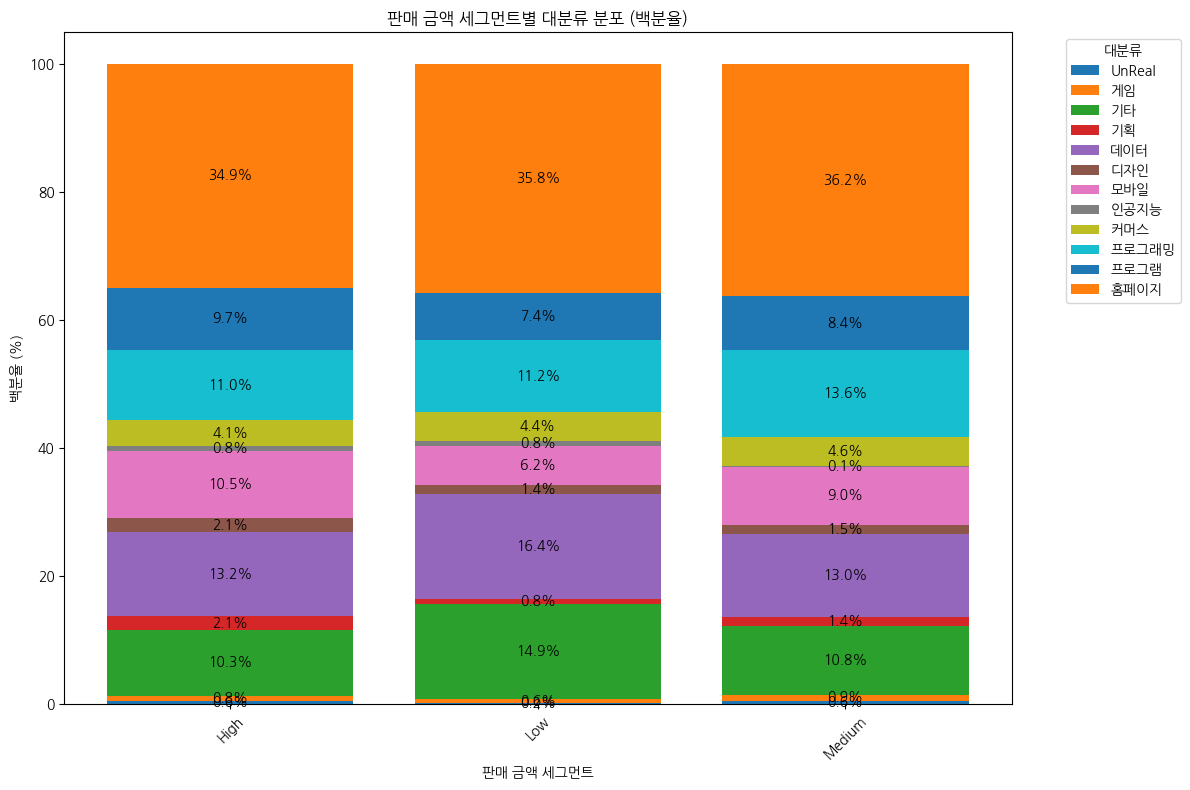

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 판매 금액 세그먼트와 대분류로 그룹화하여 카운트
segment_category_counts = merged_df.groupby(['판매 금액 세그먼트', '대분류']).size().reset_index(name='수량')

# 각 세그먼트의 총 수량을 계산
total_counts = segment_category_counts.groupby('판매 금액 세그먼트')['수량'].sum().reset_index()
total_counts.rename(columns={'수량': '총 수량'}, inplace=True)

# 누적 백분율 계산
segment_category_counts = segment_category_counts.merge(total_counts, on='판매 금액 세그먼트')
segment_category_counts['백분율'] = segment_category_counts['수량'] / segment_category_counts['총 수량'] * 100

# 시각화 설정
plt.figure(figsize=(12, 8))

# 세그먼트별 대분류를 누적하여 시각화할 데이터 준비
segment_categories = segment_category_counts['대분류'].unique()
bottoms = segment_category_counts.pivot(index='판매 금액 세그먼트', columns='대분류', values='백분율').fillna(0)

# 누적 막대그래프 생성
for category in segment_categories:
    plt.bar(bottoms.index, bottoms[category], label=category, bottom=bottoms[segment_categories[:segment_categories.tolist().index(category)]].sum(axis=1))

# 제목 및 축 라벨 설정
plt.title('판매 금액 세그먼트별 대분류 분포 (백분율)')
plt.xlabel('판매 금액 세그먼트')
plt.ylabel('백분율 (%)')
plt.xticks(rotation=45)
plt.legend(title='대분류', bbox_to_anchor=(1.05, 1), loc='upper left')

# 백분율 텍스트 표시
for i, segment in enumerate(bottoms.index):
    cumulative_height = 0  # 누적 높이 초기화
    for category in segment_categories:
        height = bottoms.loc[segment, category]
        cumulative_height += height  # 누적 높이 업데이트
        # 텍스트를 누적 높이 위에 표시
        if height > 0:  # 높이가 0보다 클 때만 텍스트 표시
            plt.text(segment, cumulative_height - height / 2, f"{height:.1f}%", ha='center', va='center')

plt.tight_layout()
plt.show()


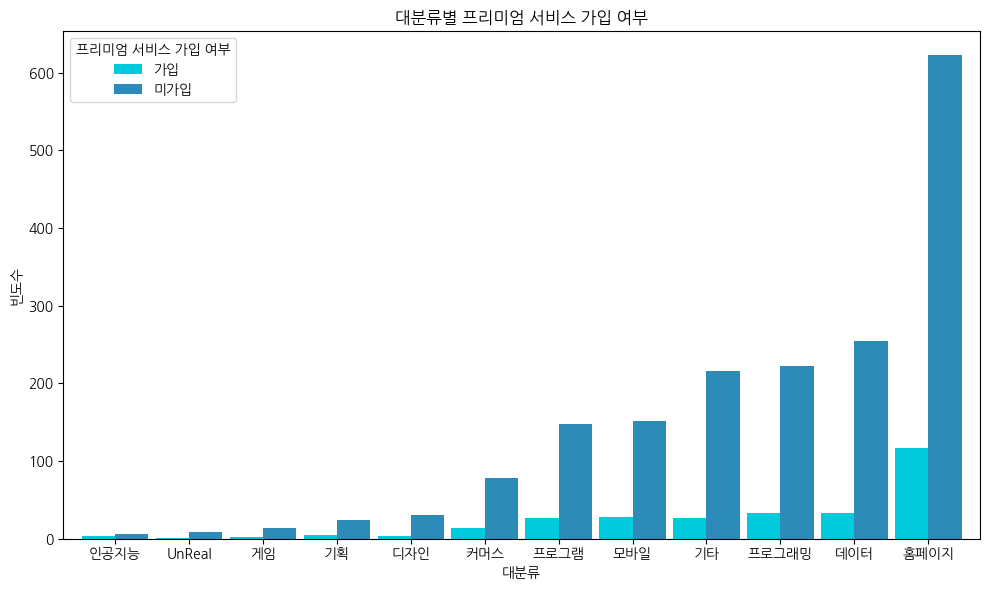

In [45]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import koreanize_matplotlib

# 대분류별 프리미엄 서비스 가입 여부 집계
premium_counts = merged_df.groupby(['대분류', '프리미엄 서비스 가입여부']).size().unstack(fill_value=0)

# 빈도 수에 따라 정렬
premium_counts = premium_counts.reindex(premium_counts.sum(axis=1).sort_values(ascending=True).index)

# 시각화
premium_counts.plot(kind='bar', figsize=(10, 6),width=0.9, color=['#00cadc', '#2d8bba'])

plt.title('대분류별 프리미엄 서비스 가입 여부')
plt.xlabel('대분류')
plt.ylabel('빈도수')
plt.xticks(rotation=0)
plt.legend(title='프리미엄 서비스 가입 여부')
plt.tight_layout()
plt.show()


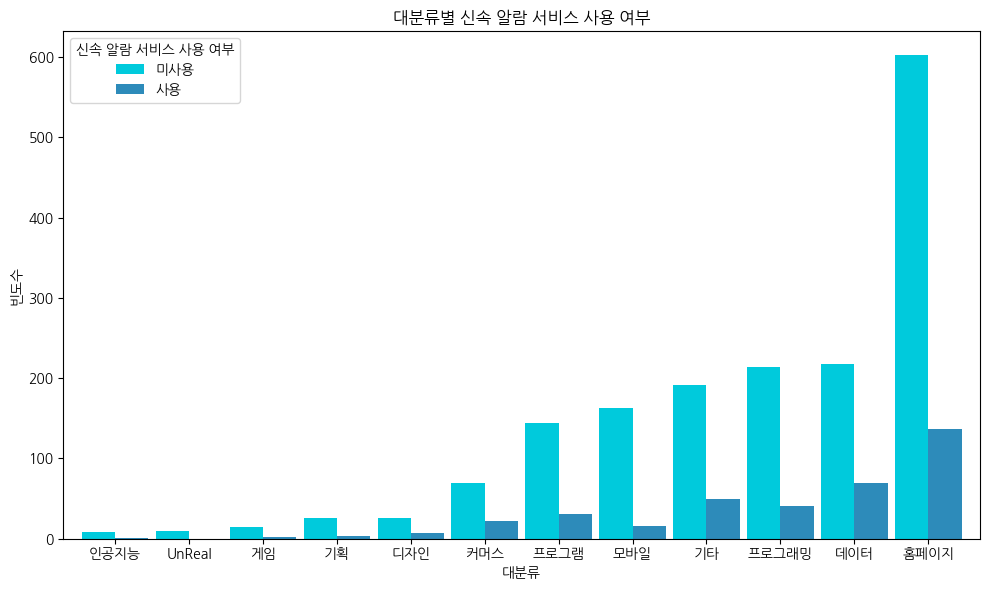

In [46]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import koreanize_matplotlib

# 대분류별 프리미엄 서비스 가입 여부 집계
premium_counts = merged_df.groupby(['대분류', '신속 알람 서비스 사용여부']).size().unstack(fill_value=0)

# 빈도 수에 따라 정렬
premium_counts = premium_counts.reindex(premium_counts.sum(axis=1).sort_values(ascending=True).index)

# 시각화
premium_counts.plot(kind='bar', figsize=(10, 6),width=0.9, color=['#00cadc', '#2d8bba'])

plt.title('대분류별 신속 알람 서비스 사용 여부')
plt.xlabel('대분류')
plt.ylabel('빈도수')
plt.xticks(rotation=0)
plt.legend(title='신속 알람 서비스 사용 여부')
plt.tight_layout()
plt.show()


In [1]:
import pandas as pd

df1 = pd.read_csv('아웃소싱 데이터/Expert_Data.csv')
df2 = pd.read_csv('아웃소싱 데이터/Log_Data02.csv')

In [2]:
import pandas as pd

df1 = pd.read_csv('아웃소싱 데이터/Service_Data.csv')

In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4159 entries, 0 to 4158
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   서비스명    4158 non-null   object 
 1   판매자     4158 non-null   object 
 2   서비스가격   4158 non-null   float64
 3   평점      4158 non-null   float64
 4   대분류     4158 non-null   object 
 5   서비스번호   4158 non-null   float64
 6   판매수     4159 non-null   int64  
dtypes: float64(3), int64(1), object(3)
memory usage: 227.6+ KB


In [11]:
df1[df1['판매자']=='TNIX']

,서비스명,판매자,서비스가격,평점,대분류,서비스번호,판매수
138,SEO가 최적화된 워드프레스 랜딩페이지를 제작해드립니다,TNIX,99000.0,0.0,홈페이지,6316.0,5
205,고객님의 워드프레스 홈페이지를 유지보수 해드립니다.,TNIX,99000.0,0.0,홈페이지,6327.0,1
499,안드로이드 앱을 개발해드립니다.,TNIX,99000.0,0.0,모바일,6328.0,1
540,영카트 쇼핑몰 웹사이트를 제작 해드립니다.,TNIX,99000.0,0.0,커머스,6322.0,28
789,파이썬 매크로 프로그램을 제작해드립니다.,TNIX,99000.0,5.0,프로그램,4868.0,19
1176,그누보드/영카트 기반 웹사이트를 유지보수 해드립니다.,TNIX,99000.0,0.0,홈페이지,6319.0,3
2008,Classic ASP 웹사이트를 유지보수 해드립니다,TNIX,99000.0,0.0,홈페이지,6326.0,2
2057,iOS 앱을 개발해드립니다.,TNIX,99000.0,0.0,모바일,6329.0,2
2297,고객님의 디스코드 봇을 유지보수 해드립니다.,TNIX,99000.0,0.0,기타,6324.0,4
2299,고객님의 파이썬 자동화 프로그램을 유지보수 해드립니다,TNIX,99000.0,0.0,프로그램,6325.0,7


In [8]:
df1['대분류'].value_counts()

대분류
홈페이지      1485
데이터        588
기타         540
프로그래밍      490
프로그램       347
모바일        311
커머스        214
디자인         67
기획          52
게임          28
인공지능        19
UnReal      17
Name: count, dtype: int64

In [9]:
df2 = pd.read_csv('아웃소싱 데이터/Expert_Data.csv')
df2.head()

,판매자ID,판매자,판매 서비스 수,총 판매 금액,프리미엄 서비스 가입여부,신속 알람 서비스 사용여부
0,V2_0,김러그,326,147927420,가입,미사용
1,V2_1,디프라이,43,146832200,가입,미사용
2,V2_2,Sailorkr,14,140029000,가입,미사용
3,V2_3,신뢰할만한지식인65,16,130713200,가입,미사용
4,V2_4,에픽핫,18,126229400,가입,미사용


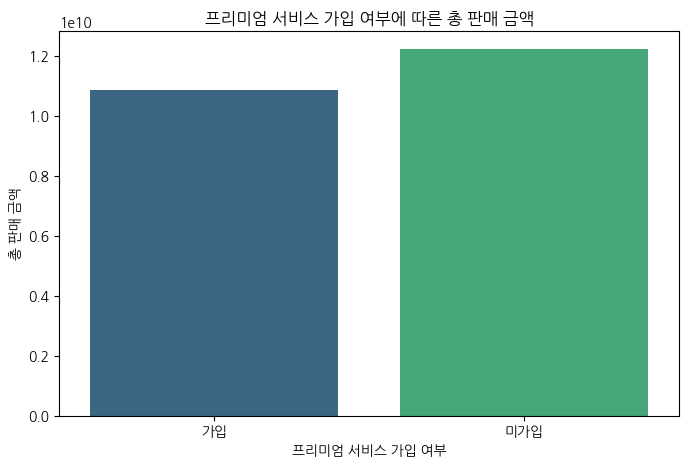

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

# 프리미엄 서비스 가입 여부 별 총 판매 금액의 합계 집계
premium_sales = df2.groupby('프리미엄 서비스 가입여부')['총 판매 금액'].sum().reset_index()

# 데이터 시각화
plt.figure(figsize=(8, 5))
sns.barplot(data=premium_sales, x='프리미엄 서비스 가입여부', y='총 판매 금액', palette='viridis')

# 레이블 및 타이틀 설정
plt.title('프리미엄 서비스 가입 여부에 따른 총 판매 금액')
plt.xlabel('프리미엄 서비스 가입 여부')
plt.ylabel('총 판매 금액')

# 그래프 출력
plt.show()


In [15]:
df2['프리미엄 서비스 가입여부'].value_counts()

프리미엄 서비스 가입여부
미가입    1774
가입      292
Name: count, dtype: int64

In [16]:
df2[df2['프리미엄 서비스 가입여부']=='가입']

,판매자ID,판매자,판매 서비스 수,총 판매 금액,프리미엄 서비스 가입여부,신속 알람 서비스 사용여부
0,V2_0,김러그,326,147927420,가입,미사용
1,V2_1,디프라이,43,146832200,가입,미사용
2,V2_2,Sailorkr,14,140029000,가입,미사용
3,V2_3,신뢰할만한지식인65,16,130713200,가입,미사용
4,V2_4,에픽핫,18,126229400,가입,미사용
...,...,...,...,...,...,...
2011,V2_2011,뾰로통한당근6195,2,47400,가입,미사용
2012,V2_2012,CodeCoffee,6,44000,가입,미사용
2013,V2_2013,까까꼬꼬,4,42600,가입,미사용
2064,V2_2064,승쿠딩,1,5000,가입,미사용


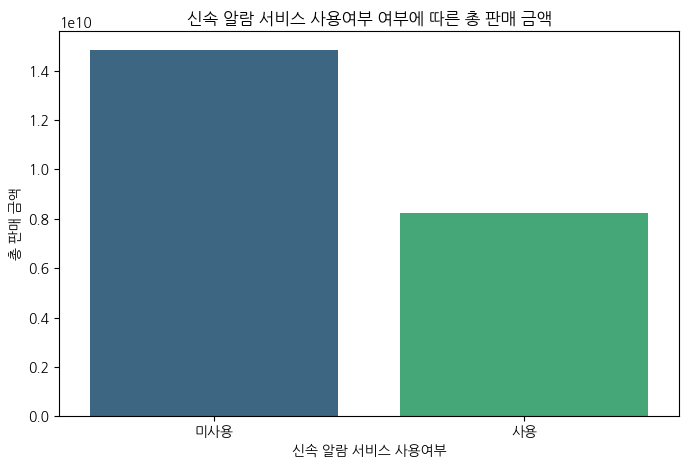

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

# 프리미엄 서비스 가입 여부 별 총 판매 금액의 합계 집계
premium_sales = df2.groupby('신속 알람 서비스 사용여부')['총 판매 금액'].sum().reset_index()

# 데이터 시각화
plt.figure(figsize=(8, 5))
sns.barplot(data=premium_sales, x='신속 알람 서비스 사용여부', y='총 판매 금액', palette='viridis')

# 레이블 및 타이틀 설정
plt.title('신속 알람 서비스 사용여부 여부에 따른 총 판매 금액')
plt.xlabel('신속 알람 서비스 사용여부')
plt.ylabel('총 판매 금액')

# 그래프 출력
plt.show()
